# Fitting the data from Trees and Air, cleaning the data

In [3]:
# Import data from "data/2015_Street_Tree_Census.csv" and "data/Air_Quality.csv"
# keep them as seperate data frames, use any relevant libraries and run print the first few rows
import pandas as pd

# Import data from "data/raw_data/2015_Street_Tree_Census.csv"
tree_df = pd.read_csv("./../data/raw_data/2015_Street_Tree_Census.csv")

# Import data from "data/raw_data/Air_Quality.csv"
air_df = pd.read_csv("./../data/raw_data/Air_Quality.csv")

# Import data from "data/raw_data/land_areas.csv"
land_df = pd.read_csv("./../data/raw_data/land_areas.csv")

# Import data from "data/raw_data/zip/codes.csv"
zip_df = pd.read_csv("./../data/raw_data/zip_codes.csv")

# Import data from "data/raw_data/UHF3_to_Zipcode_Lookup.csv"
uhf3_df = pd.read_csv("./../data/raw_data/UHF3_to_Zipcode_Lookup.csv")

In [13]:
from tabulate import tabulate
# Verify successful import of data
print(tabulate(uhf3_df.head(), headers='keys', tablefmt='psql'))
print(tabulate(zip_df.head(), headers='keys', tablefmt='psql'))
print(tabulate(land_df.head(), headers='keys', tablefmt='psql'))
print(tabulate(air_df.head(), headers='keys', tablefmt='psql'))
print(tabulate(tree_df.head(), headers='keys', tablefmt='psql'))

+----+-------------+------------------------------+----------------------------------------------------------------------+------------+
|    | UHF Code    | UHF Neighborhood Name (34)   | ZIP Code                                                             | Bourough   |
|----+-------------+------------------------------+----------------------------------------------------------------------+------------|
|  0 | 101         | Kingsbridge and Riverdale    | 10463, 10471                                                         | Bronx      |
|  1 | 102         | The Northeast Bronx          | 10466, 10469, 10470, 10475                                           | Bronx      |
|  2 | 103         | Fordham/BronxPark            | 10458, 10467, 10468                                                  | Bronx      |
|  3 | 104         | Pelham/Throgs Neck           | 10461, 10462, 10464, 10465, 10472, 10473                             | Bronx      |
|  4 | 105,106,107 | The South Bronx            

In [17]:
# Generate a df to calculate tree density by zip code;
# tree_df has zip codes under post_code column; Please create a df that has zip codes and tree count
tree_zip_df = tree_df['postcode'].value_counts().reset_index()
tree_zip_df.columns = ['zip_code', 'tree_count']
print(tabulate(tree_zip_df.head(), headers='keys', tablefmt='psql'))

+----+------------+--------------+
|    |   zip_code |   tree_count |
|----+------------+--------------|
|  0 |      10312 |        22186 |
|  1 |      10314 |        16905 |
|  2 |      10306 |        13030 |
|  3 |      10309 |        12650 |
|  4 |      11234 |        11253 |
+----+------------+--------------+


In [19]:
# Please now add a column to tree_zip_df that has the corresponding land area for each zip code, and the population; found in land_df
tree_zip_df = pd.merge(tree_zip_df, land_df, how='left', left_on='zip_code', right_on='ZIP Code')
print(tabulate(tree_zip_df.head(), headers='keys', tablefmt='psql'))

+----+------------+--------------+------------+---------------------+--------------+
|    |   zip_code |   tree_count |   ZIP Code |   Land Area (sq mi) |   Population |
|----+------------+--------------+------------+---------------------+--------------|
|  0 |      10312 |        22186 |      10312 |                7.68 |        61105 |
|  1 |      10314 |        16905 |      10314 |               13.71 |        87524 |
|  2 |      10306 |        13030 |      10306 |                7.47 |        54888 |
|  3 |      10309 |        12650 |      10309 |                6.72 |        33382 |
|  4 |      11234 |        11253 |      11234 |                7.55 |        95610 |
+----+------------+--------------+------------+---------------------+--------------+


In [34]:
# Please now add a column to tree_zip_df for the UHF Neighborhood Name (34) that the zip code falls under; found in uhf3_df
# First create a new column in uhf3_df that has the zip codes as a list, now it is currently a string with zip codes separated by commas
# Instead of merging, store the uhf3_df as a dictionary with zip codes as keys and uhf3 as values, then generate the new column in tree_zip_df by mapping the zip codes to the dictionary
uhf3_df['zip_codes'] = uhf3_df['ZIP Code'].apply(lambda x: x.split(','))
# Create a dictionary with zip codes as keys and uhf3 as values, using a loop
zip_uhf3_dict = {}
for i, row in uhf3_df.iterrows():
    # print(row['zip_codes'])
    # print(row['UHF Neighborhood Name (34)'])
    for zip_code in row['zip_codes']:
        # make the zip_code an integer
        zip_code = int(zip_code)
        zip_uhf3_dict[zip_code] = row['UHF Neighborhood Name (34)']
print(zip_uhf3_dict)
# Create a new column in tree_zip_df that maps the zip codes to the dictionary
tree_zip_df['uhf3'] = tree_zip_df['zip_code'].map(zip_uhf3_dict)
print(tabulate(tree_zip_df.head(), headers='keys', tablefmt='psql'))

{10463: 'Kingsbridge and Riverdale', 10471: 'Kingsbridge and Riverdale', 10466: 'The Northeast Bronx', 10469: 'The Northeast Bronx', 10470: 'The Northeast Bronx', 10475: 'The Northeast Bronx', 10458: 'Fordham/BronxPark', 10467: 'Fordham/BronxPark', 10468: 'Fordham/BronxPark', 10461: 'Pelham/Throgs Neck', 10462: 'Pelham/Throgs Neck', 10464: 'Pelham/Throgs Neck', 10465: 'Pelham/Throgs Neck', 10472: 'Pelham/Throgs Neck', 10473: 'Pelham/Throgs Neck', 10451: 'The South Bronx', 10452: 'The South Bronx', 10453: 'The South Bronx', 10454: 'The South Bronx', 10455: 'The South Bronx', 10456: 'The South Bronx', 10457: 'The South Bronx', 10459: 'The South Bronx', 10460: 'The South Bronx', 10474: 'The South Bronx', 11211: 'Greenpoint', 11222: 'Greenpoint', 11201: 'Downtown Brooklyn/Heights/Slope', 11205: 'Downtown Brooklyn/Heights/Slope', 11215: 'Downtown Brooklyn/Heights/Slope', 11217: 'Downtown Brooklyn/Heights/Slope', 11231: 'Downtown Brooklyn/Heights/Slope', 11212: 'Bedford Stuyvesant/Crown Heig

In [36]:
# Delete 'ZIP Code' column from tree_zip_df
tree_zip_df.drop(columns=['ZIP Code'], inplace=True)
print(tabulate(tree_zip_df.head(), headers='keys', tablefmt='psql'))

+----+------------+--------------+---------------------+--------------+------------------------+
|    |   zip_code |   tree_count |   Land Area (sq mi) |   Population | uhf3                   |
|----+------------+--------------+---------------------+--------------+------------------------|
|  0 |      10312 |        22186 |                7.68 |        61105 | Southern Staten Island |
|  1 |      10314 |        16905 |               13.71 |        87524 | Southern Staten Island |
|  2 |      10306 |        13030 |                7.47 |        54888 | Southern Staten Island |
|  3 |      10309 |        12650 |                6.72 |        33382 | Southern Staten Island |
|  4 |      11234 |        11253 |                7.55 |        95610 | Canarsie and Flatlands |
+----+------------+--------------+---------------------+--------------+------------------------+


In [37]:
# Save tree_zip_df to a csv file, make it a descriptive name and save it to the processed_data folder; it has zip_code |   tree_count |   Land Area (sq mi) |   Population | uhf3
tree_zip_df.to_csv('./../data/processed_data/tree_density_by_zip.csv', index=False)

In [106]:
# Create a new df that has the sum of tree count by uhf3
uhf3_tree_df = tree_zip_df.groupby('uhf3')['tree_count'].sum().reset_index()
# Add column for tree density from tree_zip_df
uhf3_tree_df['tree_density'] = tree_zip_df['tree_count'] / tree_zip_df['Land Area (sq mi)']
print(tabulate(uhf3_tree_df.head(), headers='keys', tablefmt='psql'))

+----+-----------------------------------+--------------+----------------+
|    | uhf3                              |   tree_count |   tree_density |
|----+-----------------------------------+--------------+----------------|
|  0 | BayRidge/Bensonhurs               |        14327 |        2888.8  |
|  1 | Bayside/Little Neck/Fresh Meadows |        36177 |        1233.04 |
|  2 | Bedford Stuyvesant/Crown Heights  |        19973 |        1744.31 |
|  3 | Borough Park                      |        21398 |        1882.44 |
|  4 | Canarsie and Flatlands            |        19100 |        1490.46 |
+----+-----------------------------------+--------------+----------------+


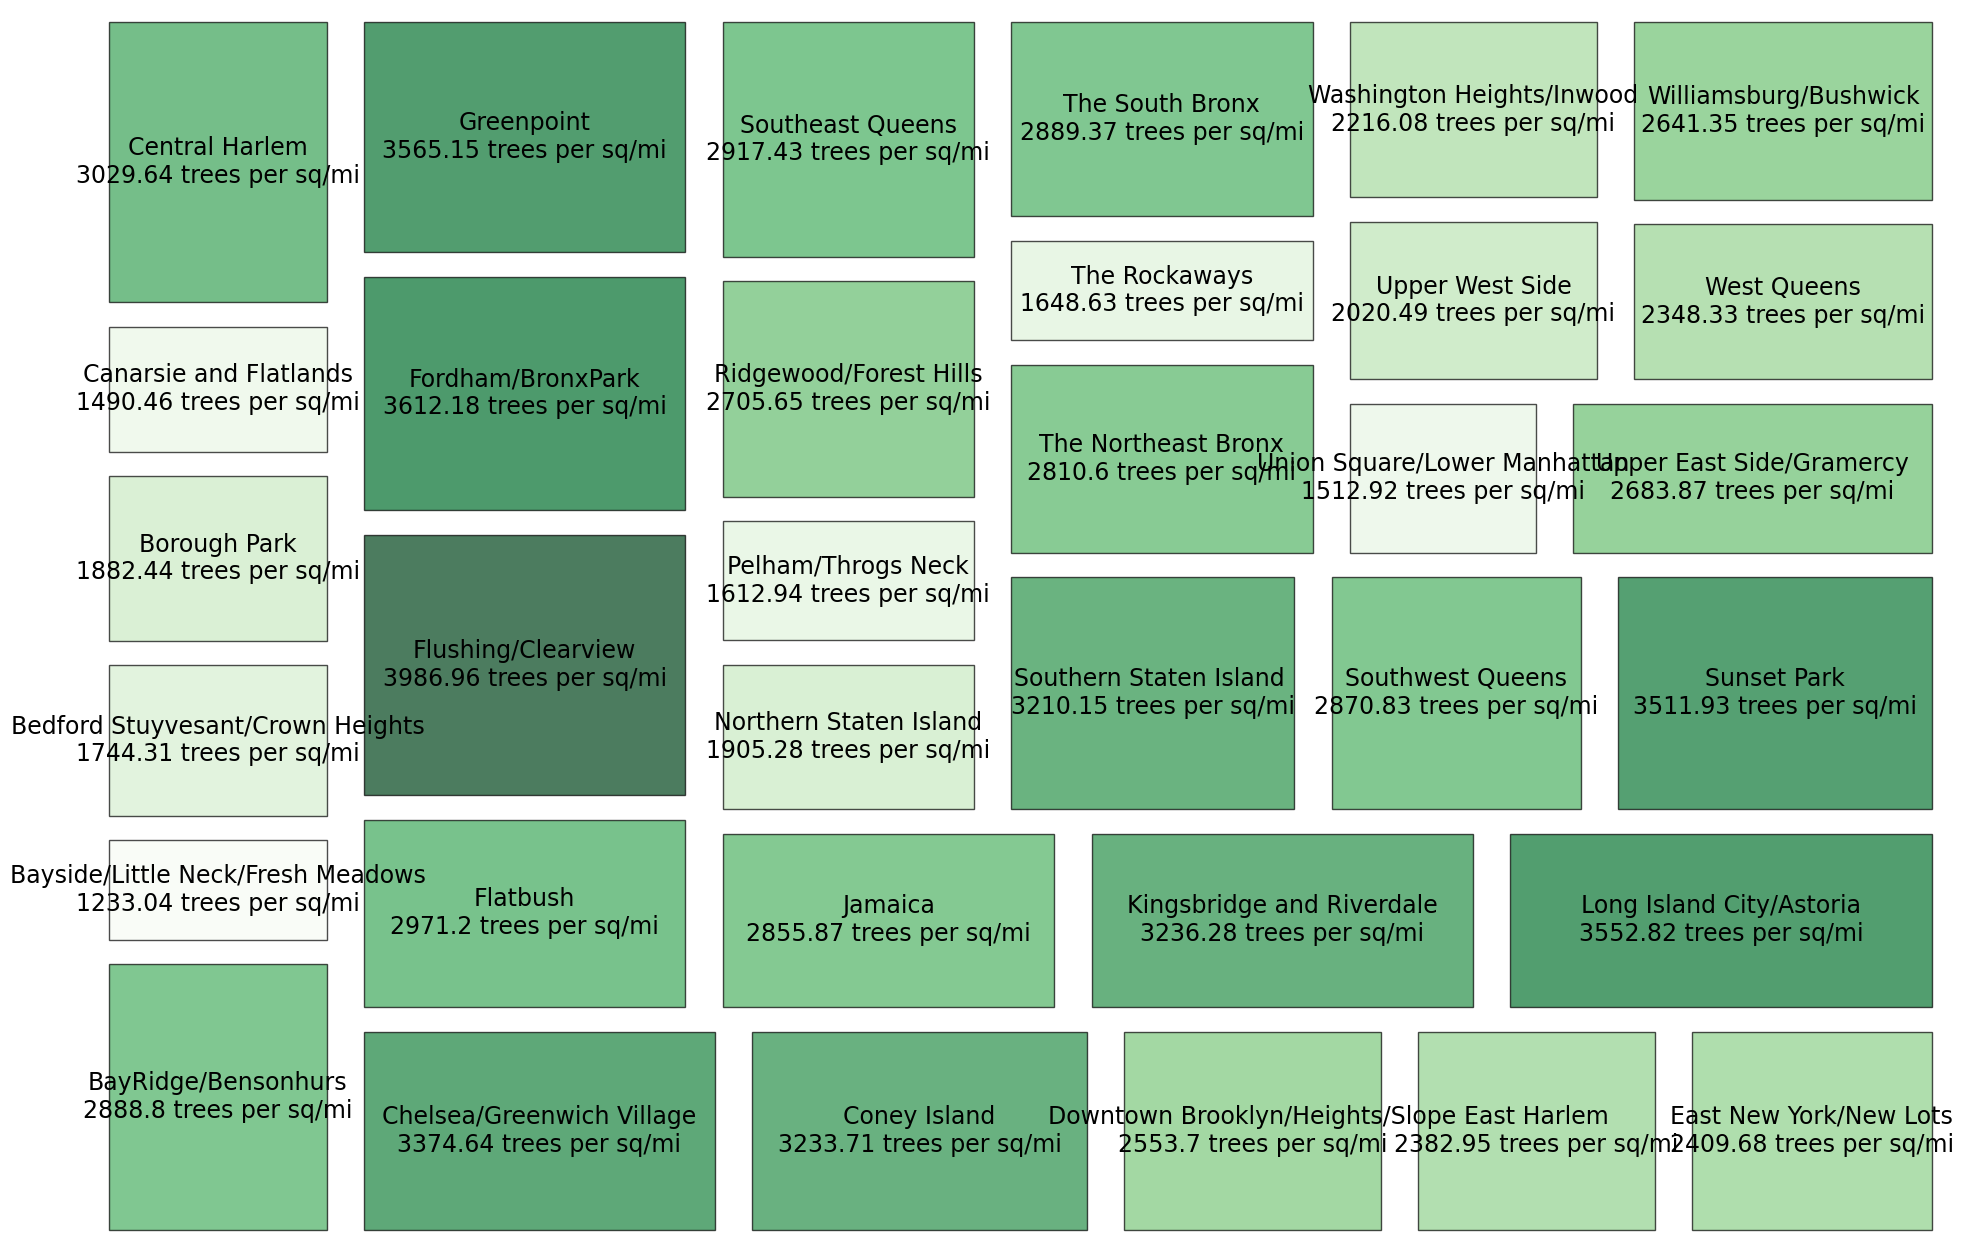

<Figure size 640x480 with 0 Axes>

In [129]:
# Generate a Tree map of tree count by zip code under categories of UHF3
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
# create a color palette, mapped to these values
cmap = sns.color_palette("Greens", as_cmap=True)
mini = min(uhf3_tree_df['tree_density'])
maxi = max(uhf3_tree_df['tree_density'])
norm = plt.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in uhf3_tree_df['tree_density']]

# round the tree_density to 2 decimal places
uhf3_tree_df['tree_density'] = uhf3_tree_df['tree_density'].round(2)

plt.figure(figsize=(24, 16))
squarify.plot(sizes=uhf3_tree_df['tree_density'], 
                label=[f'{uhf3}\n{tree_count} trees per sq/mi' for uhf3, tree_count in zip(uhf3_tree_df.uhf3, uhf3_tree_df.tree_density)], 
                alpha=.7, 
                pad=0.05,
                color=colors,
                text_kwargs={'fontsize': 17, 'color': 'black'},
                bar_kwargs={'edgecolor': 'black'})
# sort the labels

plt.axis('off')
plt.show()
# save the plot
plt.savefig('./../data/processed_data/tree_density_by_uhf3.png')

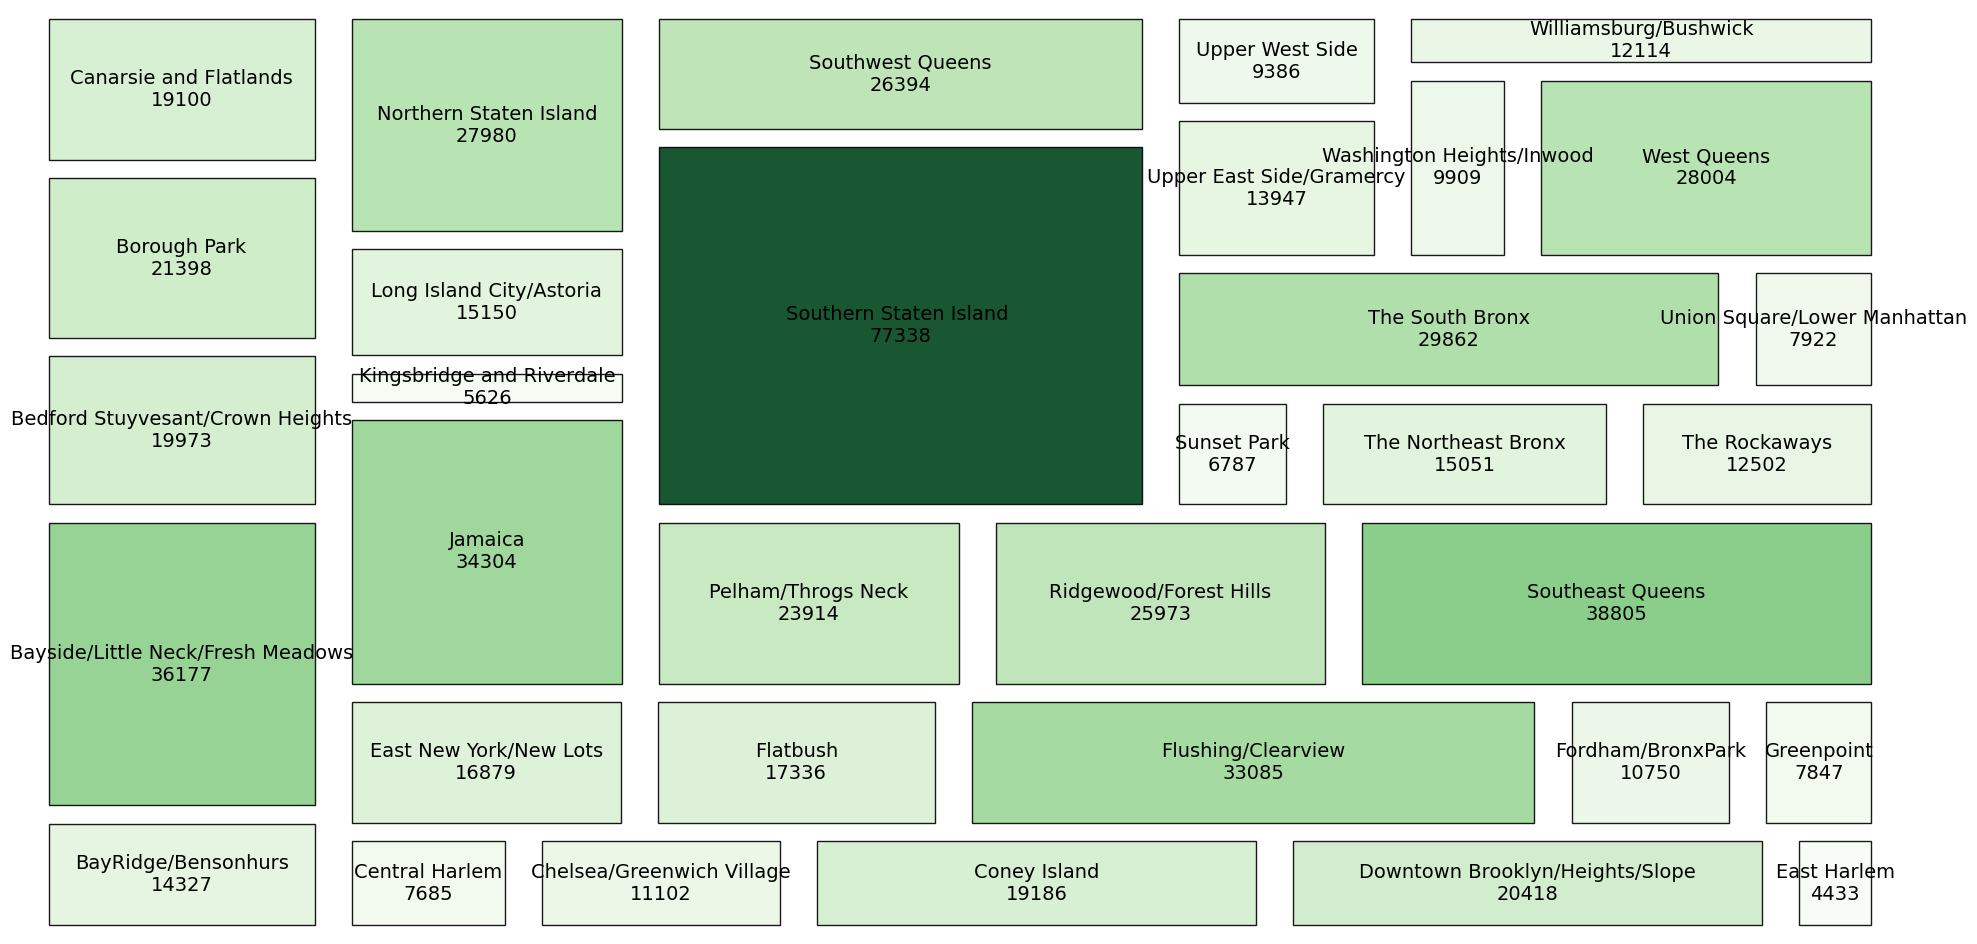

<Figure size 640x480 with 0 Axes>

In [115]:
# Generate a Tree map of tree count by zip code under categories of UHF3
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
# create a color palette, mapped to these values
cmap = sns.color_palette("Greens", as_cmap=True)
mini = min(uhf3_tree_df['tree_count'])
maxi = max(uhf3_tree_df['tree_count'])
norm = plt.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in uhf3_tree_df['tree_count']]


plt.figure(figsize=(24, 12))
squarify.plot(sizes=uhf3_tree_df['tree_count'], 
                label=[f'{uhf3}\n{tree_count}' for uhf3, tree_count in zip(uhf3_tree_df.uhf3, uhf3_tree_df.tree_count)], 
                alpha=.9, 
                pad=0.05,
                color=colors,
                text_kwargs={'fontsize': 14, 'color': 'black'},
                bar_kwargs={'edgecolor': 'black'})
# sort the labels

plt.axis('off')
plt.show()
# save the plot as a png file
plt.savefig('./../data/processed_data/tree_count_by_uhf3.png')

In [124]:
# Print out the top uhf3 with the highest tree density
print(uhf3_tree_df.sort_values('tree_density', ascending=False).head())

                        uhf3  tree_count  tree_density
12        Flushing/Clearview       33085   3986.956522
13         Fordham/BronxPark       10750   3612.182741
14                Greenpoint        7847   3565.151515
17  Long Island City/Astoria       15150   3552.820513
24               Sunset Park        6787   3511.931818
